In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
df = pd.read_csv('winequality-red.csv',sep=';')

In [37]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [38]:
df.shape

(1599, 12)

In [39]:
new_df = df.value_counts().reset_index()

In [40]:
new_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,count
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252,1.176600
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578,0.425283
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,1.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,4.000000


In [41]:
new_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,count
1354,12.8,0.84,0.63,2.4,0.088,13.0,35.0,0.99970,3.10,0.60,10.4,6,1
1355,12.9,0.35,0.49,5.8,0.066,5.0,35.0,1.00140,3.20,0.66,12.0,7,1
1356,12.9,0.50,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,1
1357,13.0,0.32,0.65,2.6,0.093,15.0,47.0,0.99960,3.05,0.61,10.6,5,1
1358,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,1


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

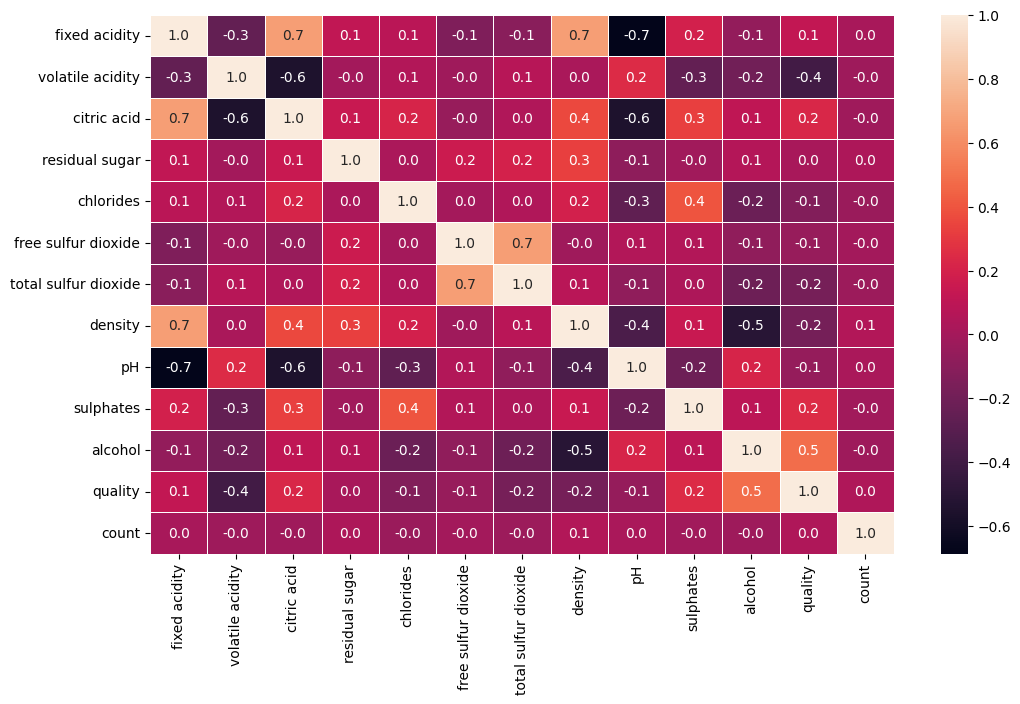

In [43]:
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 7))  # Correct way to create a subplot
sns.heatmap(new_df.corr(), annot=True, linewidths=0.5, fmt='.1f', ax=ax)

# Save the figure as an SVG file
plt.savefig("Correlation_heatmap.svg", format="svg")
plt.show()

In [60]:
X = new_df.drop(columns=['quality'])
y = new_df['quality']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print(X_test.shape,y_test.shape)
print(X_train.shape,y_train.shape)

(272, 12) (272,)
(1087, 12) (1087,)


In [63]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)  # Train the model
y_preds = dtc.predict(X_test)  # Make predictions on the test set



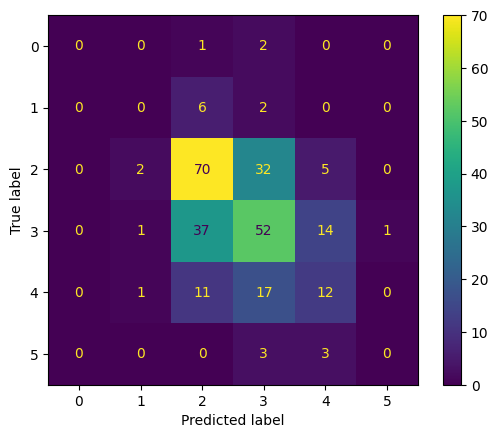

In [64]:
cm = confusion_matrix(y_test,y_preds)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot()

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Splitting data
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure labels are encoded
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Train the model
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# Make predictions and calculate accuracy
y_preds = dtc.predict(X_test)
print("Accuracy =", accuracy_score(y_test, y_preds) * 100, "%")


Accuracy = 48.161764705882355 %


In [ ]:
from sklearn.metrics import MLPClassifier
mlp 